In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# **Exploratory Data Analysis**

*Exploring our dataset to assess its rawness. We will then apply some useful data preprocessing techniques to make our data meaningful.*


In [2]:
# Loading Dataset into notebook
car_dataset = pd.read_csv('car data.csv')

In [3]:
# Dataset info
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
# Checking first 5 rows of dataset
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_dataset.shape

(301, 9)

In [7]:
# printing statistical summary of dataset
car_dataset.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# Checking for count of null values
car_dataset.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [17]:
# checking the data distribution as per the categories
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Selling_type.value_counts())
print(car_dataset.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


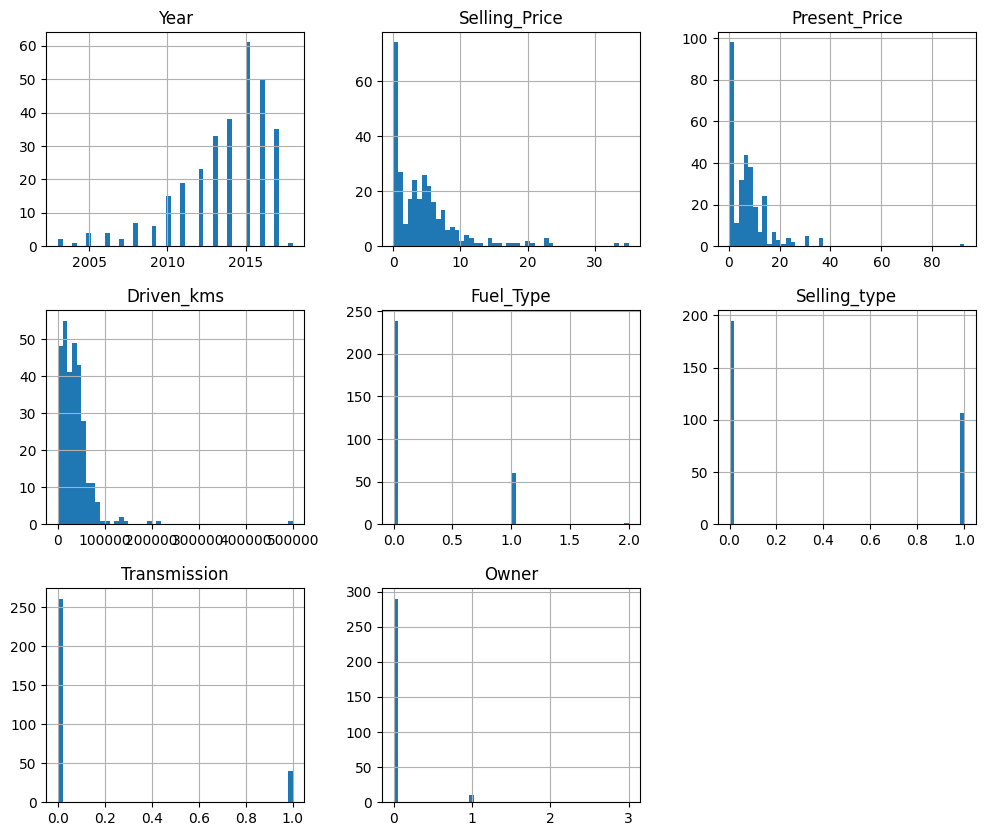

In [66]:
car_dataset.hist(figsize = (12,10), bins = 50)
plt.show()

# **Encoding Data**

*Encoding data to make it understandable for our machine learning model. Data encoding converts categorical values into numeric numbers.*


In [20]:
# Encoding Fuel col
car_dataset.replace({'Fuel_Type': {'Petrol':0, 'Diesel': 1, 'CNG': 2}}, inplace = True)
# Encoding Selling col
car_dataset.replace({'Selling_type': {'Dealer':0, 'Individual': 1}}, inplace = True)
# Encoding Fuel Transmission
car_dataset.replace({'Transmission': {'Manual':0, 'Automatic': 1}}, inplace = True)


In [24]:
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# **Splitting Data into Test/Train** 


In [26]:
# dropping unnecessary col
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [37]:
# printing X
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [38]:
# printing Y
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [42]:
# splitting 90-10 train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# Model Selection and Training
*we will import our linear regression and Lasso regression model and train it on our dataset*

## Linear Regression

In [43]:
linear_regression_model = LinearRegression()

In [44]:
linear_regression_model.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [46]:
# predictions on Training Data
training_data_prediction = linear_regression_model.predict(X_train)

In [49]:
# R-Square Error
# Y_train contain original values and training_data_prediction contain predicted values while training
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Square Error : ", error_score)

R Square Error :  0.8796483009370217


Text(0.5, 1.0, 'Actual Vs Predicted Prices')

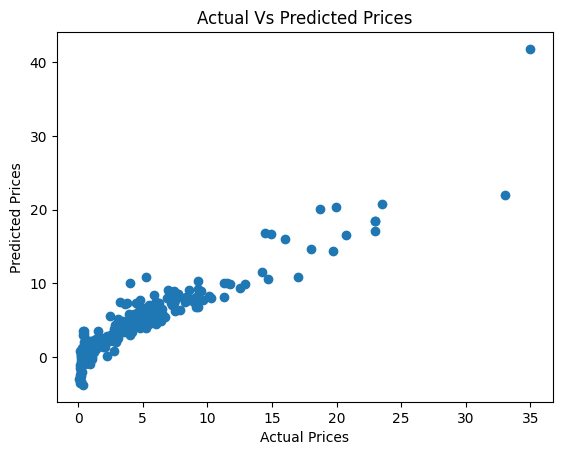

In [50]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Vs Predicted Prices")

In [51]:
# predictions on Test Data
test_data_prediction = linear_regression_model.predict(X_test)

In [52]:
# Y_test contain original values and test_data_prediction contain predicted values while testing
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Square Error : ", error_score)

R Square Error :  0.8365861023209662


Text(0.5, 1.0, 'Actual Vs Predicted Prices')

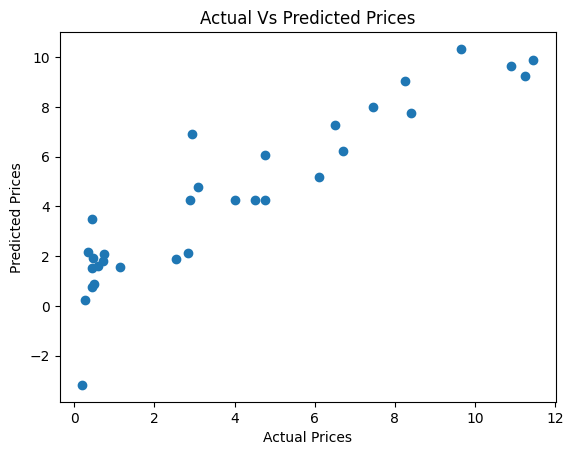

In [53]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Vs Predicted Prices")

## Lasso Regression

In [55]:
lasso_reg_model = Lasso()

In [57]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [58]:
# Predictions on Training Data
training_data_prediction = lasso_reg_model.predict(X_train)

In [59]:
# R-Square Error
# Y_train contain original values and training_data_prediction contain predicted values while training
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Square Error : ", error_score)

R Square Error :  0.8424480718240743


Text(0.5, 1.0, 'Actual Vs Predicted Prices')

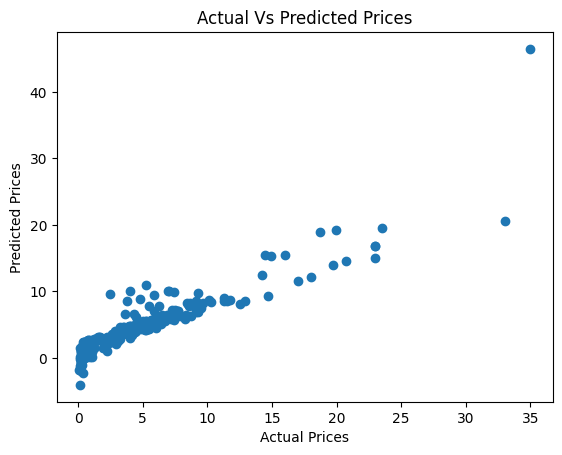

In [60]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Vs Predicted Prices")

In [61]:
# predictions on Test Data
test_data_prediction = lasso_reg_model.predict(X_test)

In [62]:
# Y_test contain original values and test_data_prediction contain predicted values while testing
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Square Error : ", error_score)

R Square Error :  0.8709763132343395


Text(0.5, 1.0, 'Actual Vs Predicted Prices')

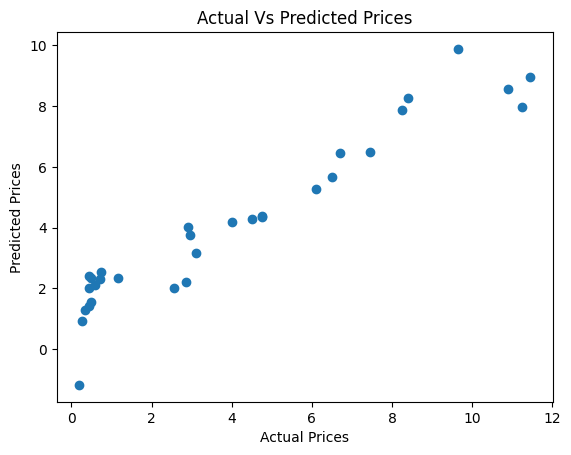

In [64]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Vs Predicted Prices")